In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the file "listings.csv" is present in the same folder as this Jupyter Notebook

In [2]:
airbnb_listings = pd.read_csv("listings.csv")

C:\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols = airbnb_listings.columns.tolist()

In [4]:
airbnb_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


In [5]:
# Randomizing the data
airbnb_listings.sample(frac=1)
airbnb_listings=airbnb_listings.copy()
airbnb_listings.shape

(20677, 106)

Below, I am removing some dataset missing values from some columns and replacing them with "None" or 0 accordingly


In [6]:
#fill missing values for last review and reviews per month with 0
airbnb_listings[["last_review", "reviews_per_month"]] = airbnb_listings[["last_review", "reviews_per_month"]].fillna(0)

In [7]:
#if there is no host name or listing name fill in None
airbnb_listings[["name", "host_name"]] = airbnb_listings[["name", "host_name"]].fillna("None")


In [8]:
#Drop rows were price of the listing is 0. We are not intersted in "free" 
#listings as they are most likely an error.
free = len(airbnb_listings[airbnb_listings.price == 0])
airbnb_listings = airbnb_listings[airbnb_listings.price != 0].copy()

In [9]:
#Print initial insights:
print("The initial dataset contained " + str(free)+ " listings with price of 0 USD, that had been removed")
print("There are " + str(len(airbnb_listings["id"].unique()))+" listings")
print("There are "+str(len(airbnb_listings.host_id.unique()))
      +" unique and indentifiable "+ "hosts.")
print("There are "+str(len(airbnb_listings[airbnb_listings["host_name"]=="None"]))
      +" unindentifiable "+ "hosts.")
print("Dataframe shape: "+str(airbnb_listings.shape))

The initial dataset contained 0 listings with price of 0 USD, that had been removed
There are 20677 listings
There are 17744 unique and indentifiable hosts.
There are 12 unindentifiable hosts.
Dataframe shape: (20677, 106)


- Having observed all the columns, and focusing on the price and yearly
availability of the listings, I have selected a limited number of columns that should be important for our analysis. 

- These 16 columns are chosen so as to keep the analysis limited and short for complexity purposes.


I have chosen these particular columns by thinking about 4 major categories of columns namely 

1.   Host descriptors (host_id, host_name, calculated_host_listings_count)
2.   Listing descriptors (id, name, room_type, minimum_nights, availability_365, price)
3.   Review Descriptors (number_of_reviews, last_review, _reviews_per_month)
4.   Location Descriptors (neighbourhood_cleansed, neighbourhood, latitude, longitude)


In [10]:
airbnb_listings.neighbourhood_cleansed

0        Oostelijk Havengebied - Indische Buurt
1                                  Centrum-Oost
2                                  Centrum-West
3                                  Centrum-West
4                                  Centrum-West
5                                  Centrum-West
6                                          Zuid
7                                  Centrum-West
8                                  Centrum-West
9                                  Centrum-West
10                                         Zuid
11                                 Centrum-West
12                                 Centrum-Oost
13                      De Pijp - Rivierenbuurt
14                       De Baarsjes - Oud-West
15                                 Centrum-West
16                                 Centrum-West
17                                Bos en Lommer
18                                   Westerpark
19                                 Centrum-West
20                                Bos en

In [11]:
airbnb_listings = airbnb_listings[["id", "name", "host_id", "host_name", "calculated_host_listings_count", "room_type", "minimum_nights", "availability_365", "price", "number_of_reviews", "last_review", "reviews_per_month", "neighbourhood_cleansed", "neighbourhood", "latitude", "longitude"]]

- Each listing contains "Calculated_host_listings_count", which is a count of total listing by a specific host in the provided data. The logic below derives value of the calculated host listings count for a specific listing (20168 in this example) and checks if it is equal to the total number of listings by that host (whose host ID is 59484) in the dataset

- The comparison yields true, meaning that "calculated_host_listings_count" for the specific host indicated gives an accurate number of listings posted by the same host. Properties could then easily related by the host ID.

In [12]:
(len(airbnb_listings[airbnb_listings["host_id"]==59484]) == airbnb_listings[airbnb_listings["id"]==20168]["calculated_host_listings_count"]).tolist()

[True]

In [13]:
airbnb_listings[(airbnb_listings["calculated_host_listings_count"]>1)][["host_id","calculated_host_listings_count"]].sort_values(by=['host_id'])

,host_id,calculated_host_listings_count
2,56142,2
634,56142,2
1,59484,2
2230,59484,2
14378,65041,2
10,65041,2
12539,77484,5
11255,77484,5
517,77484,5
542,77484,5


- Next, lets shift focus to the minimum nights.
- Here I am plotting a histogram of minimum nights of rental required in the listing:


I will also limit my analysis to lisitngs that are confined to 31 minimum nights at most, in order to exclude long term rentals. Therefore, my analysis will target short term renters, most likley vistors to the city, majority of whom may be tourists.

In [14]:
airbnb_listings_old = airbnb_listings.copy()
airbnb_listings = airbnb_listings[airbnb_listings["minimum_nights"] <=31].copy()
removed_listings = len(airbnb_listings_old)-len(airbnb_listings)

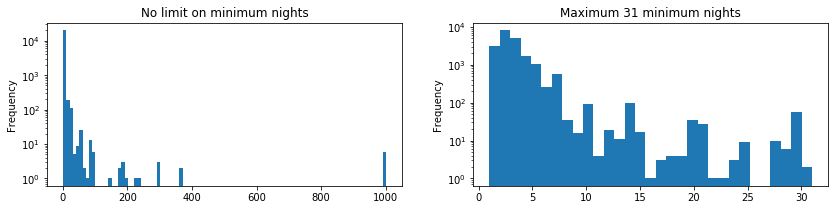

In [15]:
fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.hist(airbnb_listings_old.minimum_nights, bins=100, log=True)
ax1.set_ylabel("Frequency")
ax1.set_title("No limit on minimum nights")

ax2.hist(airbnb_listings.minimum_nights, bins=31, log=True)
ax2.set_ylabel("Frequency")
ax2.set_title("Maximum 31 minimum nights")

plt.show()

In [16]:
print("As a result of imposing minimum nights limit, " + str(removed_listings)+" listings were removed.")

As a result of imposing minimum nights limit, 79 listings were removed.


In [17]:
airbnb_listings.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
calculated_host_listings_count      0
room_type                           0
minimum_nights                      0
availability_365                    0
price                               0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
neighbourhood_cleansed              0
neighbourhood                     826
latitude                            0
longitude                           0
dtype: int64

- The dataframe currently has only 826 rows out of 20598 rows with a null value in the "neighbourhood" column. 

- So let us remove those rows as the difference would not be very significant if we remove about 5% of the data.

In [18]:
airbnb_listings = airbnb_listings[airbnb_listings['neighbourhood'].notnull()]

Let us check the types of all the columns in the dataframe

In [19]:
airbnb_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
calculated_host_listings_count      int64
room_type                          object
minimum_nights                      int64
availability_365                    int64
price                              object
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
neighbourhood_cleansed             object
neighbourhood                      object
latitude                          float64
longitude                         float64
dtype: object

The type of "price" column is object of type "string". 
However, we want some summary statistics about it, therefore we need to convert it to float data type

In [20]:
airbnb_listings['price'].apply(type).value_counts()

<class 'str'>    19772
Name: price, dtype: int64

In [21]:
airbnb_listings['price'] = airbnb_listings['price'].str.replace('$', '')
airbnb_listings['price'] = airbnb_listings['price'].str.replace(',', '')

In [22]:
airbnb_listings['price'] = airbnb_listings['price'].astype('float')

In [23]:
airbnb_listings.describe()

,id,host_id,calculated_host_listings_count,minimum_nights,availability_365,price,number_of_reviews,reviews_per_month,latitude,longitude
count,1.977200e+04,1.977200e+04,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000
mean,1.784076e+07,5.608537e+07,5.055533,2.910125,53.330265,159.689308,23.389440,0.860527,52.366443,4.885620
std,1.041890e+07,6.782976e+07,23.325749,2.607628,98.907183,159.870642,48.950806,1.299917,0.014775,0.030702
min,2.818000e+03,3.159000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,52.321590,4.753120
25%,9.249698e+06,8.705276e+06,1.000000,2.000000,0.000000,99.000000,2.000000,0.140000,52.355830,4.862770
50%,1.762193e+07,2.573488e+07,1.000000,2.000000,0.000000,130.000000,9.000000,0.430000,52.365285,4.885295
75%,2.594477e+07,7.636854e+07,1.000000,3.000000,47.000000,180.000000,23.000000,0.990000,52.375563,4.905650
max,3.759099e+07,2.839422e+08,208.000000,31.000000,365.000000,8915.000000,767.000000,33.670000,52.424710,4.980150


In [24]:
airbnb_listings.shape

(19772, 16)

Below is a statistical summary of the columns in the dataframe. We can conclude that:

- there are 19772 rows of data being considered
- all listings are about 52.3 latitude and about 4.8 longitude squarely fitting into Amsterdam's geographic location
- the listing price ranges between 0 USD and 8915 USD with mean price of 160 USD and standard deviation of 160 USD suggesting a very broad price range distribution
- the minimum nights limit ranges betweeen 1 and 31 as determined above. It averages at 2.9, but as we have seen it is not normally distributed
- on average the listings are available 53 days per year. It would be interesting to understand if the listings are available in short intervals (such as weekends) or long intervals (several months at a time). Perhaps this can be understood by looking at the correlation between minimum nights and availability.

In [25]:
#separate out numerical variables
a=pd.DataFrame(airbnb_listings.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()[2:]


In [26]:
numeric_vars

['calculated_host_listings_count',
 'minimum_nights',
 'availability_365',
 'price',
 'number_of_reviews',
 'reviews_per_month',
 'latitude',
 'longitude']

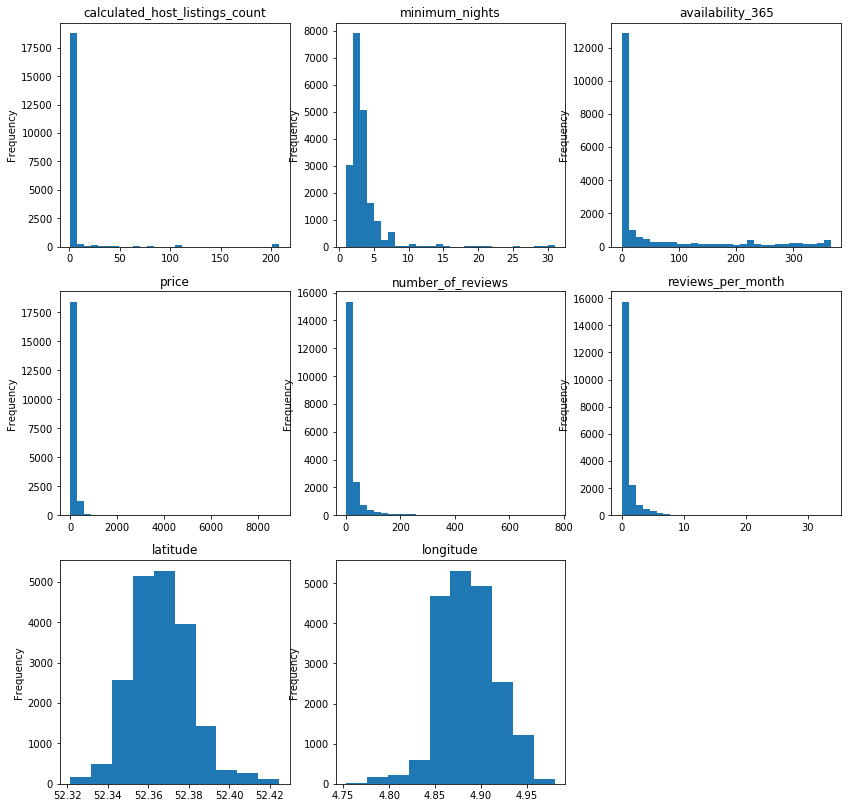

In [27]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

ax1.hist(airbnb_listings[numeric_vars[0]], bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[0])

ax2.hist(airbnb_listings[numeric_vars[1]], bins=30)
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[1])

ax3.hist((airbnb_listings[numeric_vars[2]]), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title(numeric_vars[2])

ax4.hist(airbnb_listings[numeric_vars[3]], bins=30)
ax4.set_ylabel("Frequency")
ax4.set_title(numeric_vars[3])

ax5.hist(airbnb_listings[numeric_vars[4]], bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title(numeric_vars[4])

ax6.hist(airbnb_listings[numeric_vars[5]], bins=30)
ax6.set_ylabel("Frequency")
ax6.set_title(numeric_vars[5])

ax7.hist(airbnb_listings[numeric_vars[6]])
ax7.set_ylabel("Frequency")
ax7.set_title(numeric_vars[6])

ax8.hist(airbnb_listings[numeric_vars[7]])
ax8.set_ylabel("Frequency")
ax8.set_title(numeric_vars[7])


plt.show()


Looking at the distributions, clearly the following are heavily right skewed:

- price
- minimum_nights
- available_365
- number of reviews
- reviews per month
- calculated_host_lising_count

One way to reduce the skeweness is to logarithmically transform the distributions

In [28]:
numeric_vars

['calculated_host_listings_count',
 'minimum_nights',
 'availability_365',
 'price',
 'number_of_reviews',
 'reviews_per_month',
 'latitude',
 'longitude']

Now, we need to check and remove any entries with price "0" for log conversion because otherwise it will throw a "divide by zero" Runtime error

In [29]:
airbnb_listings = airbnb_listings.loc[airbnb_listings['price'] != 0]

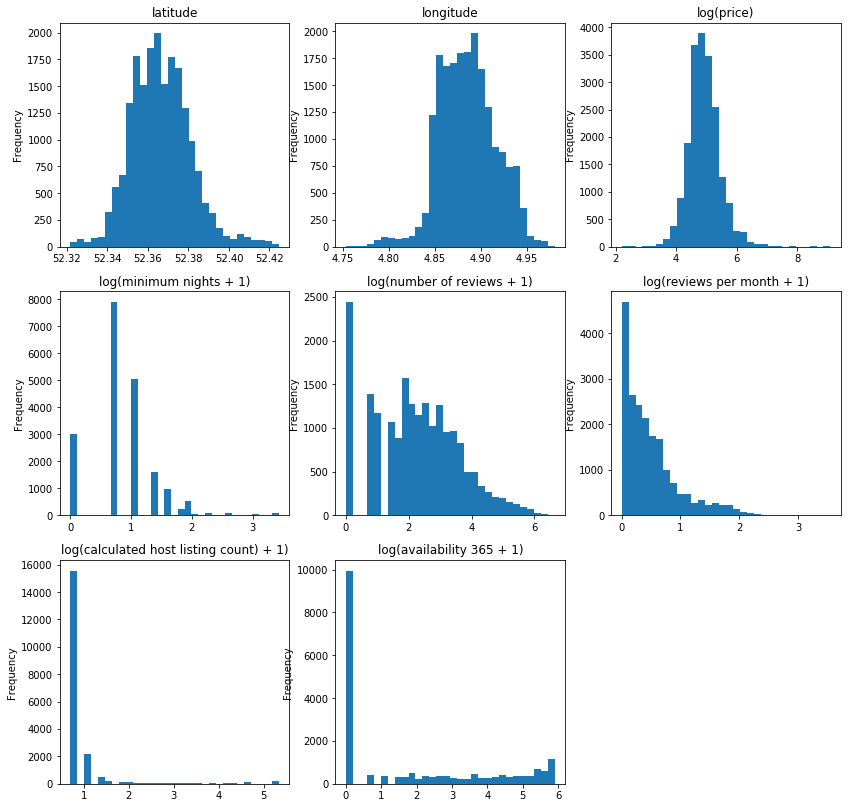

In [30]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

ax1.hist(airbnb_listings[numeric_vars[6]], bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[6])

ax2.hist(airbnb_listings[numeric_vars[7]], bins=30)
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[7])

ax3.hist(np.log((airbnb_listings[numeric_vars[3]])), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title('log(price)')

ax4.hist(np.log((airbnb_listings[numeric_vars[1]])), bins=31)
ax4.set_ylabel("Frequency")
ax4.set_title("log(minimum nights + 1)")

ax5.hist(np.log(airbnb_listings[numeric_vars[4]]+1), bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title("log(number of reviews + 1)")

ax6.hist(np.log(airbnb_listings[numeric_vars[5]]+1), bins=30)
ax6.set_ylabel("Frequency")
ax6.set_title("log(reviews per month + 1)")

ax7.hist(np.log(airbnb_listings[numeric_vars[0]]+1), bins=30)
ax7.set_ylabel("Frequency")
ax7.set_title("log(calculated host listing count) + 1)")

ax8.hist(np.log(airbnb_listings[numeric_vars[2]]+1), bins=30)
ax8.set_ylabel("Frequency")
ax8.set_title("log(availability 365 + 1)")

plt.show()

In [31]:
for num in numeric_vars[:6]:
    airbnb_listings["log_("+num+" +1)"] = np.log(airbnb_listings[num]+1)
airbnb_listings["log_price"] = np.log(airbnb_listings.price)
airbnb_listings=airbnb_listings.drop(columns = numeric_vars[:6]).copy()

In [34]:
airbnb_listings.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'room_type',
 'last_review',
 'neighbourhood_cleansed',
 'neighbourhood',
 'latitude',
 'longitude',
 'log_(calculated_host_listings_count +1)',
 'log_(minimum_nights +1)',
 'log_(availability_365 +1)',
 'log_(price +1)',
 'log_(number_of_reviews +1)',
 'log_(reviews_per_month +1)',
 'log_price']

In [35]:
airbnb_listings = airbnb_listings.drop(['log_(price +1)'], axis=1)

Note that logarithmic data transformation was used to smooth out the distributions.

Let's see if any correlations between variables start to emerge:



In [36]:
numeric_vars = airbnb_listings.columns.tolist()[8:16]

In [37]:
numeric_vars

['latitude',
 'longitude',
 'log_(calculated_host_listings_count +1)',
 'log_(minimum_nights +1)',
 'log_(availability_365 +1)',
 'log_(number_of_reviews +1)',
 'log_(reviews_per_month +1)',
 'log_price']

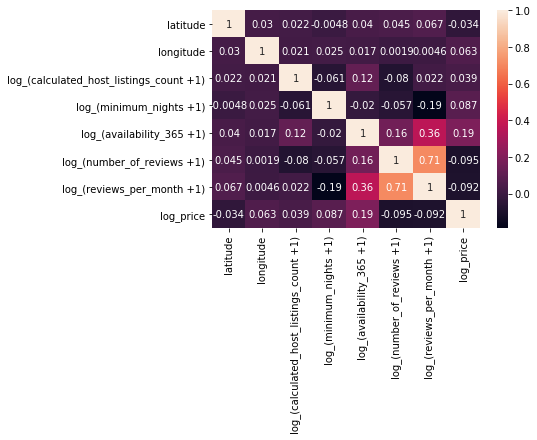

In [38]:
import seaborn as sns
x=airbnb_listings[numeric_vars].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

- Price is also positively correlated with: increasing availability, the fact that the property is rented by a host who lists other properties, and increasing number of minimum nights
- Price is negatively correlated with number of reviews and reviews per month, indicating that it is possible that the prior reviews could depress the prices to some extent
-Longitude and Latitude do not seem to have any significant effect on the price.

Next, let us focus on non-numerical variables


In [39]:
#separate out numerical variables
a=pd.DataFrame(airbnb_listings.dtypes.copy())
b= a[a[0] == 'object'].reset_index()
#drop id and host id:
non_num=b["index"].tolist()
print(non_num)

['name', 'host_name', 'room_type', 'last_review', 'neighbourhood_cleansed', 'neighbourhood']


We already know that location is an important price determinant. Hence let's dig a bit deeper to see how mean prices vary by neighborhood

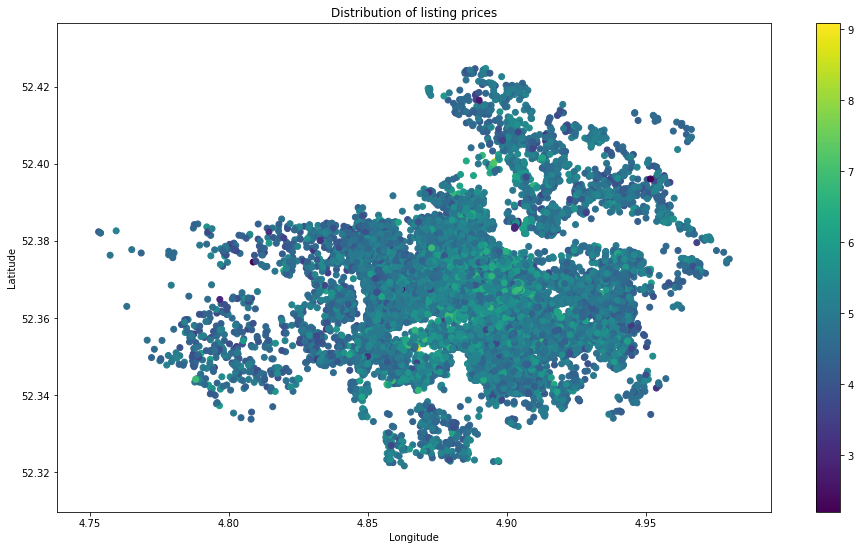

In [40]:
y = airbnb_listings.latitude
x = airbnb_listings.longitude
p = airbnb_listings.log_price
plt.figure(figsize=(16,9))
plt.scatter(x,y,c=p,cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of listing prices")
plt.show()

- The scatter plot above visualizes the geographical distribution of listings along with the relative pricing (increasing with brightening color).

- Let's group the data by neighbourhood, deriving mean pricing for each neighbourhood:

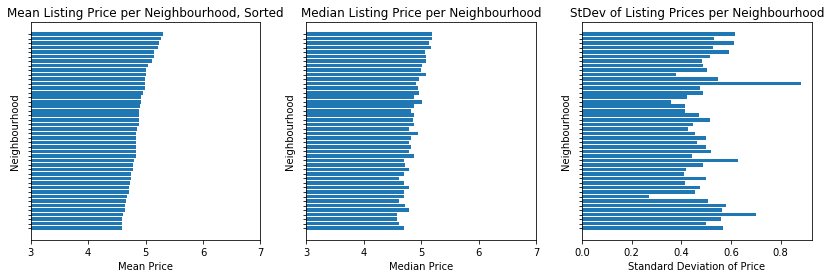

In [41]:
grouped = airbnb_listings.groupby("neighbourhood")
price_grouped = grouped["log_price"]
price = price_grouped.agg([np.mean,np.median,np.max, np.std]).sort_values("mean")


fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.barh(price.index,price["mean"])
ax1.set_yticklabels([])
ax1.set_ylabel("Neighbourhood")
ax1.set_xlabel("Mean Price")
ax1.set_title("Mean Listing Price per Neighbourhood, Sorted")
ax1.set_xlim(3,7)

ax2.barh(price.index,price["median"])
ax2.set_yticklabels([])
ax2.set_ylabel("Neighbourhood")
ax2.set_xlabel("Median Price")
ax2.set_title("Median Listing Price per Neighbourhood")
ax2.set_xlim(3,7)

ax3.barh(price.index,price["std"])
ax3.set_yticklabels([])
ax3.set_ylabel("Neighbourhood")
ax3.set_xlabel("Standard Deviation of Price")
ax3.set_title("StDev of Listing Prices per Neighbourhood")
plt.show()

Based on current findings it is worth to one-hot encode the neighbourhood variable:

In [42]:
#One hot encoding
airbnb_listings = pd.concat([airbnb_listings, pd.get_dummies(airbnb_listings["neighbourhood"], drop_first=False)], axis=1)
#save neighborhoods into a list for further analysis:
neighbourhoods = airbnb_listings.neighbourhood.values.tolist()
# boroughs = df.neighbourhood_group.unique().tolist()
#drop the neighbourhood column from the database
airbnb_listings.drop(['neighbourhood'],axis=1, inplace=True)

In [43]:
airbnb_listings.shape

(19771, 59)

The next obvious variable to evaluate is Room type. This variable provides information about relative privacy that comes with the listing as well as its size



The following table shows some basic statistics about the "log_price" grouped according to the "room_type"

In [44]:
grouped = airbnb_listings.groupby("room_type")
room_type_price_grouped = grouped["log_price"]
room_type_price = room_type_price_grouped.agg([np.mean,np.median,np.max, np.std]).sort_values("mean")
room_type_price

,mean,median,amax,std
room_type,,,,
Shared room,4.384217,4.134366,6.907755,1.104750
Private room,4.551729,4.499810,8.929303,0.491092
Entire home/apt,5.013930,4.980170,9.095491,0.465678


This shows that the data most likely includes some outliers but I am not removing them for now for the sake of simplicity.

Now, we are also converting the room_types to dummies (separate columns of each room_type and dropping the column itself)

In [45]:
#convert room types to dummies
airbnb_listings = pd.concat([airbnb_listings, pd.get_dummies(airbnb_listings["room_type"], drop_first=False)], axis=1)
airbnb_listings.drop(['room_type'],axis=1, inplace=True)

In [46]:
airbnb_listings.shape

(19771, 61)

"Last review" is a data when last review has been posted. Perhaps the most effective way of dealing with this variable is to

- covert it to number of days since last review counting down from the data the data was scraped off the web
- categorize

In [47]:
import datetime as dt
#convert object to datetime:
airbnb_listings["last_review"] = pd.to_datetime(airbnb_listings["last_review"])
#Check the latest review date in the datebase:
print(airbnb_listings["last_review"].max())

2019-08-08 00:00:00


The last review in the database dates to 8th August, 2019, which will be used as time zero for analysis:



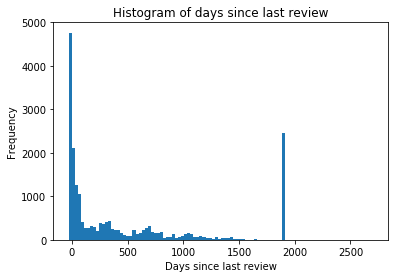

In [48]:
airbnb_listings["last_review"]=airbnb_listings["last_review"].apply(lambda x: dt.datetime(2019,7,8)-x)
airbnb_listings["last_review"]=airbnb_listings["last_review"].dt.days.astype("int").replace(18085, 1900)
plt.hist(airbnb_listings["last_review"], bins=100)
plt.ylabel("Frequency")
plt.xlabel("Days since last review")
plt.ylabel("Frequency")
plt.title("Histogram of days since last review")
plt.show()

Replace with the following categories for simplification:

- last month 
- last 6 months
- last year
- last 5 years
- never

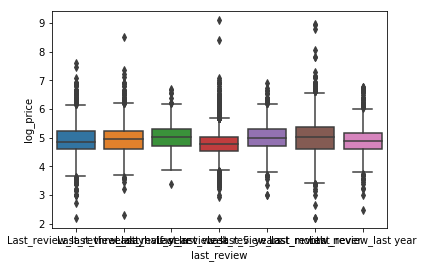

In [49]:
def date_replacement(date):
    if date <=3:
        return "Last_review_last_three_day"
    elif date <= 7:
        return "Last_review_last_week"
    elif date <= 30:
        return "Last_review_last_month"
    elif date <= 183:
        return "Last_review_last_half_year"
    elif date <= 365:
        return "Last_review_last year"
    elif date <= 1825:
        return "Last_review_last_5_years"
    else:
        return "Last_review_never" 

    
airbnb_listings["last_review"]=airbnb_listings["last_review"].apply(lambda x: date_replacement(x))
sns.boxplot(x="last_review", y=airbnb_listings.log_price, data=airbnb_listings)
plt.show()

Time since last review does not show any clear trend on the sale of entire dataset. Yet it may be important to keep the categorical values included for later machine learning experiments.




In [50]:
#convert last review to dummies
airbnb_listings = pd.concat([airbnb_listings, pd.get_dummies(airbnb_listings["last_review"], drop_first=False)], axis=1)
airbnb_listings.drop(["last_review"],axis=1, inplace=True)

Now, let us do some Natural Language Processing to obtain more insights from the non-numerical variables

In [51]:
#import necessary libraries
import nltk
import os
import nltk.corpus
from nltk import ne_chunk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [52]:
#initiate stopwords
a = set(stopwords.words('english'))
#obtain text
text = airbnb_listings["name"].iloc[10]
#tokenize text
text1 = word_tokenize(text.lower())
#create a list free of stopwords
no_stopwords = [x for x in text1 if x not in a]
#lemmatize the words
lemmatizer = WordNetLemmatizer() 
lemmatized = [lemmatizer.lemmatize(x) for x in no_stopwords]

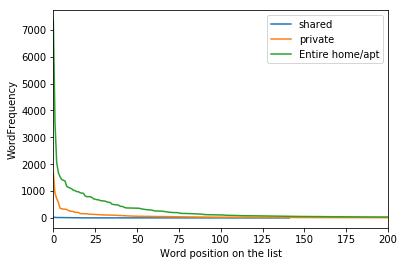

In [53]:
def unique_words1(dwelling):

    apt = airbnb_listings[airbnb_listings[dwelling]==1]["name"]
    a = set(stopwords.words('english'))
    words = []
    # append each to a list
    for lis in range(0, len(apt)):
        listing = apt.reset_index().iloc[lis,1]
        #tokenize text
        text1 = word_tokenize(listing.lower())
        #create a list free of stopwords
        no_stopwords = [x for x in text1 if x not in a]
        #lemmatize the words
        lemmatized = [lemmatizer.lemmatize(x) for x in no_stopwords]
        no_punctuation = [x.translate(str.maketrans('','',string.punctuation)) for x in lemmatized]
        no_digits = [x.translate(str.maketrans('','',"0123456789")) for x in no_punctuation ]
        for item in no_digits:
            words.append(item)


    #create a dictionary
    unique={}
    for word in words:
        if word in unique:
            unique[word] +=1
        else:
            unique[word] = 1

    #sort the dictionary
    a=[]
    b=[]

    for key, value in unique.items():
        a.append(key)
        b.append(value)

    aa=pd.Series(a)
    bb=pd.Series(b)    

    comb=pd.concat([aa,bb],axis=1).sort_values(by=1, ascending=False).copy()

    return comb

#apply the function
private = unique_words1("Private room")
home = unique_words1("Entire home/apt")
shared = unique_words1("Shared room")

words_private = private.iloc[1:,1]
words_home = home.iloc[1:,1] 
words_shared = shared.iloc[1:,1] 

#plot the results
plt.plot(words_shared.reset_index()[1], label="shared")
plt.plot(words_private.reset_index()[1], label ="private")
plt.plot(words_home.reset_index()[1], label="Entire home/apt")
plt.xlim(0,200)
plt.ylabel("WordFrequency")
plt.xlabel("Word position on the list")
plt.legend()
plt.show()

In [56]:
home_new = home.reset_index().iloc[1:50,1:3].copy()
private_new = private.reset_index().iloc[1:50,1:3].copy()
shared_new = shared.reset_index().iloc[1:50,1:3].copy()

all_words = pd.concat([home_new, private_new, shared_new], axis=1)
all_words

,0,1,0,1,0,1
1,apartment,7360,room,1679,bed,26
2,amsterdam,3536,amsterdam,918,room,19
3,spacious,2066,private,723,amsterdam,16
4,city,1686,apartment,584,dorm,15
5,centre,1537,city,362,mixed,13
6,near,1432,studio,341,shared,13
7,house,1403,centre,329,apartment,13
8,garden,1373,center,325,cozy,10
9,center,1181,cozy,315,ensuite,9
10,family,1139,bedroom,276,bedded,8


In [57]:
#see how many listing there are for each type of room:
print("Numer of shared room listings: "+str(len(airbnb_listings[airbnb_listings["Shared room"]==1])))
print("Numer of private room listings: "+str(len(airbnb_listings[airbnb_listings["Private room"]==1])))
print("Numer of entire home/apt listings: "+str(len(airbnb_listings[airbnb_listings["Entire home/apt"]==1])))

Numer of shared room listings: 74
Numer of private room listings: 3889
Numer of entire home/apt listings: 15808


In [58]:
#Create a list of the most popular words common for all room types:
most_popular_words = home_new.iloc[:,0].tolist()+private_new.iloc[:,0].tolist()+shared_new.iloc[:,0].tolist()
most_popular = pd.Series(most_popular_words)
popular_descriptors=most_popular.unique().tolist()

In [59]:
def unique_words2(name, word):
    '''This function takes individual name and looks for a matching word in it'''
    a = set(stopwords.words('english'))
    #tokenize the name
    text1 = word_tokenize(str(name).lower())
    #create a list free of stopwords
    no_stopwords = [x for x in text1 if x not in a]
    #lemmatize the words
    lemmatized = [lemmatizer.lemmatize(x) for x in no_stopwords]
    no_punctuation = [x.translate(str.maketrans('','',string.punctuation)) for x in lemmatized]
    no_digits = [x.translate(str.maketrans('','',"0123456789")) for x in no_punctuation ]
    counter = 0
    for item in no_digits:
        if str(item) == str(word):
            counter += 1
        else:
            continue

    if counter != 0:
        return 1
    else:
        return 0
    
#Apply the function 
for item in popular_descriptors:
    airbnb_listings[item]= airbnb_listings["name"].apply(lambda x: unique_words2(x,item))

In [60]:
#convert the last 
airbnb_listings = pd.concat([airbnb_listings, pd.get_dummies(airbnb_listings['neighbourhood_cleansed'], drop_first=False)], axis=1)
airbnb_listings.drop(['neighbourhood_cleansed'],axis=1, inplace=True)

In [61]:
#drop unnecessary columns
airbnb_listings = airbnb_listings.drop(['id','name','host_id','host_name'], axis=1).copy()
#copy for later
airbnb_listings2 = airbnb_listings.copy()
airbnb_listings.shape

(19771, 163)

In [62]:
len(popular_descriptors)

82

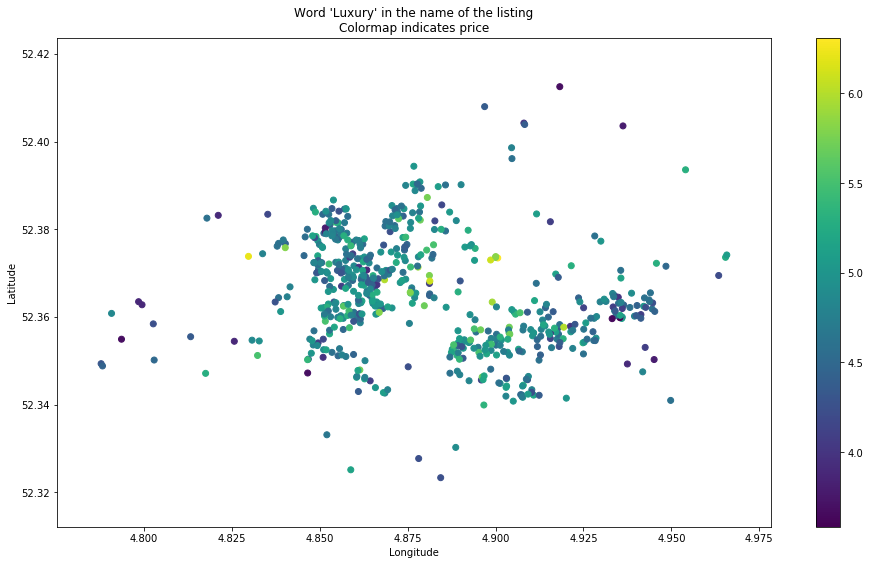

In [63]:
def plot_by_word(word):
    '''creates a plot of price for listings matching given word'''
    y = airbnb_listings[(airbnb_listings[word]==1)].latitude
    x = airbnb_listings[(airbnb_listings[word]==1)].longitude
    p = airbnb_listings[(airbnb_listings[word]==1)].log_price
    plt.figure(figsize=(16,9))
    plt.scatter(x,y,c=p,cmap='viridis')
    plt.xlabel
    plt.colorbar()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Word 'Luxury' in the name of the listing\nColormap indicates price")
    plt.show()
    
#Sample plot for a given word (from "all words" dataframe) 
plot_by_word("balcony")

# Price Prediciton through Machine Learning:

With data cleaning and feature engineering complete, it is time now to apply machine learning algorithms to develop an approprie price prediction model and derive futher insights.



In [67]:
#import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
import xgboost as xgb

from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score


You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [68]:
target = airbnb_listings['log_price'].copy()
#drop unnecessary columns
airbnb_listings = airbnb_listings.drop(['log_price'], axis=1).copy()
#strip the target column from input columns and put it in front
airbnb_listings = pd.concat([target, airbnb_listings], axis=1).copy()
#select input variable columns
nums = airbnb_listings.iloc[:,1:]

Review the final dataframe for analysis


In [69]:
airbnb_listings.head()

,log_price,latitude,longitude,log_(calculated_host_listings_count +1),log_(minimum_nights +1),log_(availability_365 +1),log_(number_of_reviews +1),log_(reviews_per_month +1),Amsterdam Centrum,Banne Buiksloot,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
0,4.077537,52.36575,4.94142,0.693147,1.386294,4.499810,5.590987,1.137833,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4.382027,52.36509,4.89354,1.098612,0.693147,4.828314,5.648974,1.241269,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.828314,52.37297,4.88339,1.098612,2.708050,4.330733,1.386294,0.148420,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.010635,52.38673,4.89208,0.693147,1.098612,4.204693,5.278115,1.134623,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.317488,52.36719,4.89092,1.386294,1.098612,4.934474,5.648974,1.278152,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
airbnb_listings.columns.tolist()

['log_price',
 'latitude',
 'longitude',
 'log_(calculated_host_listings_count +1)',
 'log_(minimum_nights +1)',
 'log_(availability_365 +1)',
 'log_(number_of_reviews +1)',
 'log_(reviews_per_month +1)',
 'Amsterdam Centrum',
 'Banne Buiksloot',
 'Bos en Lommer',
 'Buiksloterham',
 'Buikslotermeer',
 'Buitenveldert-Oost',
 'Buitenveldert-West',
 'De Pijp',
 'De Wallen',
 'Frederik Hendrikbuurt',
 'Grachtengordel',
 'Hoofddorppleinbuurt',
 'IJplein en Vogelbuurt',
 'Indische Buurt',
 'Jordaan',
 'Kadoelen',
 'Landelijk Noord',
 'Museumkwartier',
 'Nieuwendam-Noord',
 'Nieuwendammerdijk en Buiksloterdijk',
 'Nieuwendammerham',
 'Nieuwmarkt en Lastage',
 'Oost',
 'Oostelijke Eilanden en Kadijken',
 'Oosterparkbuurt',
 'Oostzanerwerf',
 'Osdorp',
 'Oud-West',
 'Oud-Zuid',
 'Overtoomse Veld',
 'Rivierenbuurt',
 'Slotermeer-Noordoost',
 'Slotermeer-Zuidwest',
 'Slotervaart',
 'Spaarndammer en Zeeheldenbuurt',
 'Stadionbuurt',
 'Tuindorp Buiksloot',
 'Tuindorp Nieuwendam',
 'Tuindorp Oostzaa

Let us check if there are any duplicate columns in our dataframe and remove them.

In [73]:
airbnb_listings.shape

(19771, 163)

In [74]:
airbnb_listings = airbnb_listings.loc[:,~airbnb_listings.columns.duplicated()]

In [75]:
airbnb_listings.shape

(19771, 159)

There were 4 duplicate columns which got removed by doing the above operation of removing duplicate columns.

With one hot encoding, feature engineering and natural language processing the shape of the dataframe grew substantially.

- Several numeric columns have been log transformed
- Individual neighborhoods have been one hot encoded along with categorized times since the last review
- Lastly columns were created to document use of popular words in the listing name

Next, let's use the entire dataset and feed it into some of the most common regression models to see what sort of root mean square error we get:

In [76]:
y= target
x = nums
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)


Removing any duplicate columns from "x": our input data

In [77]:
x.shape

(19771, 162)

In [78]:
x = x.loc[:,~x.columns.duplicated()]

In [79]:
x.shape

(19771, 158)

Decision Tree Model

In [80]:
rmse_dt=[]
dt = DecisionTreeRegressor()

# K-fold Cross Validation
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(dt ,x,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_dt.append(avg_rmse)
print("Root mean square error: " +str(round(rmse_dt[0],2)))

Root mean square error: 0.54


XGBoost Algorithm


In [81]:
rmse_xg = []
data_dmatrix = xgb.DMatrix(data=x,label=y)
params = {
              'colsample_bytree': 0.9,
              'learning_rate': 0.1,
              'max_depth': 1, 
              'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, num_boost_round=300,
                        early_stopping_rounds=10, metrics="rmse", as_pandas=True, 
                        seed=123)
    
rmse_xg.append(cv_results["test-rmse-mean"].tolist()[-1])
print("Root mean square error: " +str(round(rmse_xg[0],2)))

Root mean square error: 0.4


Random Forest Regression

In [82]:
rmse_rf=[]
rf=RandomForestRegressor(n_estimators = 100, random_state=1,  min_samples_leaf=2)
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(rf ,x,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_rf.append(avg_rmse)
print("Root mean square error: ")
print(rmse_rf)

Root mean square error: 
[0.38894845821212864]


Neural Network

In [83]:
rmse_nndf=[]
mlp = MLPRegressor(activation='relu', max_iter=1000)
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(mlp ,x,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_nndf.append(avg_rmse)
print("Root mean square error: ")
print(rmse_nndf)

Root mean square error: 
[0.4139289719148251]


In [84]:
dt = pd.Series(rmse_dt, name ="Decision Tree")
rand = pd.Series(rmse_rf, name ="Random Forest")
xgb = pd.Series(rmse_xg, name ="XG Boost")
nn = pd.Series(rmse_nndf, name="Neural Network")
pd.concat([dt,rand,xgb,nn],axis=1)

,Decision Tree,Random Forest,XG Boost,Neural Network
0,0.544026,0.388948,0.404848,0.413929


Random Forest model yields the lowest RMSE (0.38). Thus, let us try to make predictions and check our accuracy for this model.

In [85]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [86]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Mean Absolute Error: 3.83 degrees.

Mean Absolute Error: 0.29 degrees.


In [87]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.03 %.


We are getting a decent accuracy of 94.03% by using 1000 estimators.

The model can be further optimized by using bagging and boosting operations